In [1]:
import numpy as np
import math

In [15]:
print(math.acos(1))
print(math.acos(0))
print()

a = 2
b = 1
c = 1e-6
relation = (a**2 + b**2 - c**2)/(2*a*b)
print("Relation = ", relation)

cosine = math.acos(relation)
print("Cosine = ", cosine)


0.0
1.5707963267948966

Relation =  1.24999999999975


ValueError: math domain error

In [2]:
len_test = 4

for j in reversed(range(len_test)):
    print(j, j+1)

3 4
2 3
1 2
0 1


In [18]:
a = [1]
c = [2]
d = [3]
b = []

b.append(a)
b.append(c)
b.append(d)
print(b)
print()

h = np.array(b)

print(h)
print(h.shape)
print(np.squeeze(h))
print()

print(np.array(b).squeeze())



[[1], [2], [3]]

[[1]
 [2]
 [3]]
(3, 1)
[1 2 3]

[1 2 3]


In [7]:
a = np.array([1, 2, 3, 4])
a = np.reshape(a, (4, 1))
print(a.shape)
c = np.zeros_like(a)

c[0:-1] = a[0:-1] - a[1:]
print()
print(a)
print()
print(c)

c[-1] = a[-1] - 0
print()
print(c)


(4, 1)

[[1]
 [2]
 [3]
 [4]]

[[-1]
 [-1]
 [-1]
 [ 0]]

[[-1]
 [-1]
 [-1]
 [ 4]]


In [8]:
a = np.array([1, 2, 3, 4])
a = np.reshape(a, (4, 1))

b = np.flip(a)

print(a)
print()
print(b)

[[1]
 [2]
 [3]
 [4]]

[[4]
 [3]
 [2]
 [1]]


In [9]:
a = np.array([1, 2, 3])
print(a.shape[0])
print(a)
print()

a = np.insert(a, 2, 8)
print(a.shape)
print(a)

3
[1 2 3]

(4,)
[1 2 8 3]


In [16]:
a = np.array([[10, 20], [30, 40]])
idx = np.array([1, 0])
id_row = np.arange(len(a))

print(id_row)
print(a.shape)
print(a[id_row, idx])

[0 1]
(2, 2)
[20 30]


In [3]:
a = np.array([10, 20])
idx  = 1
#idx = np.array([1, 0])
#id_row = np.arange(len(a))

#print(id_row)
print(a.shape)
print(a[idx])

(2,)
20


In [8]:
name = type(1)
print(name)
if name == type(1):
    print("I'm Int")

<class 'int'>
I'm Int


In [11]:
import os

# cwd = os.getcwd()
# print(cwd)

# Count all files in a directory
folder_path = '../DRL/storage/models'

checkpoint_files = [name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))]
# checkpoint_files = [name for name in os.listdir(folder_path) ]

print(checkpoint_files)
print(len(checkpoint_files))

[]
0


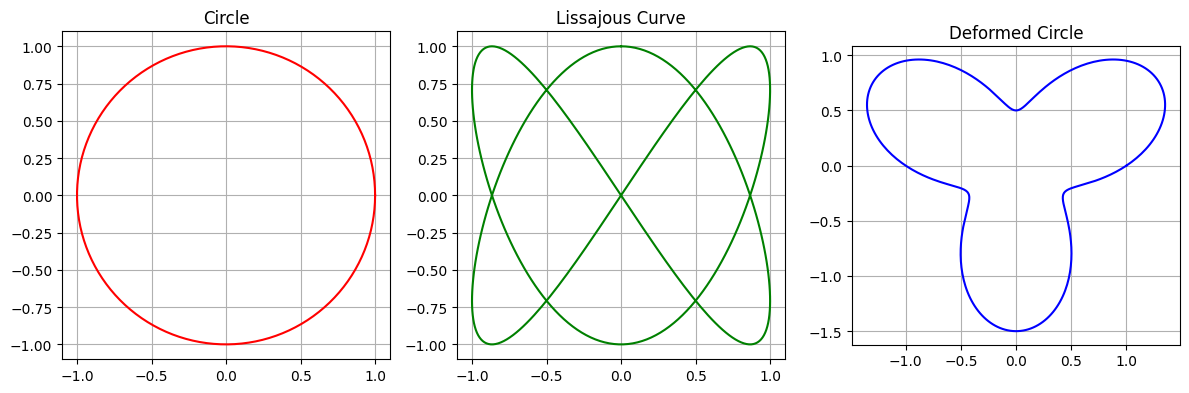

In [2]:
import matplotlib.pyplot as plt

# Define the parameter t
t = np.linspace(0, 2 * np.pi, 400)

# Define parametric equations
x1, y1 = np.cos(t), np.sin(t)  # Circle
x2, y2 = np.sin(2*t), np.cos(3*t)  # Lissajous curve
x3, y3 = (1 + 0.5*np.sin(3*t)) * np.cos(t), (1 + 0.5*np.sin(3*t)) * np.sin(t)  # Deformed circle

# Create figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# First plot
axes[0].plot(x1, y1, 'r')
axes[0].set_title("Circle")

# Second plot
axes[1].plot(x2, y2, 'g')
axes[1].set_title("Lissajous Curve")

# Third plot
axes[2].plot(x3, y3, 'b')
axes[2].set_title("Deformed Circle")

# Adjust layout
for ax in axes:
    ax.set_aspect('equal')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('TkAgg')  # Set the backend before importing pyplot
from matplotlib.animation import FuncAnimation
import numpy as np

class RealtimePlot:
    def __init__(self, max_points=100):
        # Create figure and axis
        plt.ion()  # Turn on interactive mode
        self.fig, self.ax = plt.subplots(figsize=(10, 6))
        self.max_points = max_points
        
        # Initialize empty lists for data
        self.x_data = list(range(max_points))
        self.y_data = [0] * max_points
        
        # Create initial line
        self.line, = self.ax.plot(self.x_data, self.y_data, 'b-')
        
        # Set up the plot
        self.ax.set_xlim(0, max_points)
        self.ax.set_ylim(-1, 1)  # Adjust as needed
        self.ax.grid(True)
        self.ax.set_title('Real-time Plot')
        
        # Show the plot
        plt.show()
        
    def add_point(self, value):
        # Add new data point
        self.y_data.pop(0)
        self.y_data.append(value)
        
        # Update line data
        self.line.set_ydata(self.y_data)
        
        # Update y-axis limits if needed
        ymin, ymax = min(self.y_data), max(self.y_data)
        margin = (ymax - ymin) * 0.1 if ymax != ymin else 0.1  # 10% margin
        self.ax.set_ylim(ymin - margin, ymax + margin)
        
        # Redraw the plot
        self.fig.canvas.draw()
        self.fig.canvas.flush_events()

# Example usage
if __name__ == "__main__":
    import time
    
    # Create the real-time plot
    plotter = RealtimePlot(max_points=50)
    
    # Simulate data generation and plotting
    try:
        for i in range(200):
            # Generate some sample data (replace with your data source)
            value = np.sin(i * 0.1) + np.random.normal(0, 0.1)
            
            # Add the new point to the plot
            plotter.add_point(value)
            
            # Your other code can go here
            print(f"Processing iteration {i}")
            
            # Small pause to make the animation visible
            time.sleep(0.05)
            
    except KeyboardInterrupt:
        print("Stopped by user")
    
    # Keep the plot window open
    plt.ioff()
    plt.show()

Processing iteration 0
Processing iteration 1
Processing iteration 2
Processing iteration 3
Processing iteration 4
Processing iteration 5
Processing iteration 6
Processing iteration 7
Processing iteration 8
Processing iteration 9
Processing iteration 10
Processing iteration 11
Processing iteration 12
Processing iteration 13
Processing iteration 14
Processing iteration 15
Processing iteration 16
Processing iteration 17
Processing iteration 18
Processing iteration 19
Processing iteration 20
Processing iteration 21
Processing iteration 22
Processing iteration 23
Processing iteration 24
Processing iteration 25
Processing iteration 26
Processing iteration 27
Processing iteration 28
Processing iteration 29
Processing iteration 30
Processing iteration 31
Processing iteration 32
Processing iteration 33
Processing iteration 34
Processing iteration 35
Processing iteration 36
Processing iteration 37
Processing iteration 38
Processing iteration 39
Processing iteration 40
Processing iteration 41
Pr

In [3]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('TkAgg')
import numpy as np

class MultiRealtimePlot:
    def __init__(self, num_plots=3, max_points=100):
        plt.ion()
        self.fig, self.axes = plt.subplots(1, num_plots, figsize=(15, 5))
        self.max_points = max_points
        self.num_plots = num_plots
        
        # Initialize data for each plot
        self.x_data = list(range(max_points))
        self.y_data = [[0] * max_points for _ in range(num_plots)]
        self.lines = []
        
        # Set up each subplot
        titles = ['Plot 1', 'Plot 2', 'Plot 3']
        colors = ['b-', 'r-', 'g-']
        
        for i in range(num_plots):
            line, = self.axes[i].plot(self.x_data, self.y_data[i], colors[i])
            self.lines.append(line)
            
            self.axes[i].set_xlim(0, max_points)
            self.axes[i].set_ylim(-1, 1)
            self.axes[i].grid(True)
            self.axes[i].set_title(titles[i])
        
        # Adjust layout to prevent overlap
        plt.tight_layout()
        plt.show()
        
    def add_points(self, values):
        """
        Add new points to all plots
        values: list of values, one for each plot
        """
        if len(values) != self.num_plots:
            raise ValueError(f"Expected {self.num_plots} values, got {len(values)}")
            
        for i in range(self.num_plots):
            # Update data for each plot
            self.y_data[i].pop(0)
            self.y_data[i].append(values[i])
            
            # Update line data
            self.lines[i].set_ydata(self.y_data[i])
            
            # Update y-axis limits
            ymin, ymax = min(self.y_data[i]), max(self.y_data[i])
            margin = (ymax - ymin) * 0.1 if ymax != ymin else 0.1
            self.axes[i].set_ylim(ymin - margin, ymax + margin)
        
        # Redraw the plot
        self.fig.canvas.draw()
        self.fig.canvas.flush_events()

# Example usage
if __name__ == "__main__":
    import time
    
    # Create the real-time plots
    plotter = MultiRealtimePlot(num_plots=3, max_points=50)
    
    try:
        for i in range(200):
            # Generate different sample data for each plot
            value1 = np.sin(i * 0.1) + np.random.normal(0, 0.1)  # Sine wave + noise
            value2 = np.cos(i * 0.1) + np.random.normal(0, 0.1)  # Cosine wave + noise
            value3 = np.sin(i * 0.05) * np.cos(i * 0.1)  # More complex pattern
            
            # Add new points to all plots
            plotter.add_points([value1, value2, value3])
            
            # print(f"Processing iteration {i}")
            time.sleep(0.05)
            
    except KeyboardInterrupt:
        print("Stopped by user")
    
    plt.ioff()
    plt.show()

Stopped by user
